<div style="border:solid green 2px; padding: 20px">
<b>Hello, Yonatan!</b>

My name is Grigoriy Gusarov and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project! Excellent job, all your charts are correct! Unfortunately, I can't accept your job right now because of the private URL link. Please, make your presentation file public.

<div class="alert alert-info"> <b>Sorry for this. I changed it to public. Thank you for reiewing my project!</div>
    
**Update**:<br>
Thank you for the URL update! Great job, your project has been accepted!    

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Barplot vs pie chart overview: <a>https://chartio.com/learn/charts/how-to-choose-pie-chart-vs-bar-chart/</a></li>
        <li>Pandas profilier: <a>https://github.com/pandas-profiling/pandas-profiling</a></li>
        <li>Top 50 matplotlib visualizations: <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/</a></li>
    </ul>
</div>

---

# Project Description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?

You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Data description
`rest_data` table:
* *object_name* — establishment name
* *chain* — chain establishment (TRUE/FALSE) 
* *object_type* — establishment type 
* *address* — address
* *number* — number of seats

## Preprocessing

### Imports

In [12]:
! pip install -Uq sidetable
! pip install -Uq usaddress

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px 
import sidetable as stb
import usaddress
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

### rest_data table

In [18]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


### Info

In [21]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please note that 64 bits is an excessive amount of space for storing your features. Also, some of them  can be coded as categorical or boolean. Here you can read more about data type optimization: <br><a>https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e</a>
</div>

In [24]:
rest_data.describe(include='all')

,id,object_name,address,chain,object_type,number
count,9651.000000,9651,9651,9648,9651,9651.000000
unique,NaN,8672,8517,2,6,NaN
top,NaN,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant,NaN
freq,NaN,47,11,5972,7255,NaN
mean,16611.000000,NaN,NaN,NaN,NaN,43.695161
std,2786.148058,NaN,NaN,NaN,NaN,47.622874
min,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,14198.500000,NaN,NaN,NaN,NaN,14.000000
50%,16611.000000,NaN,NaN,NaN,NaN,27.000000
75%,19023.500000,NaN,NaN,NaN,NaN,46.000000


In [27]:
rest_data.object_name.value_counts().head()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
Name: object_name, dtype: int64

### Data types convertion

In [30]:
rest_data.chain = rest_data.chain.astype('bool')

### Missing values

In [33]:
rest_data.stb.missing()

,missing,total,percent
id,0,9651,0.0
object_name,0,9651,0.0
address,0,9651,0.0
chain,0,9651,0.0
object_type,0,9651,0.0
number,0,9651,0.0


### Duplicates

In [36]:
rest_data.duplicated().sum()

0

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: in this reserach it's also reasonable to check the dataframe for the partly duplicates, without id and number of seats. Sometimes data could be collected from different sources and some rows could contradict each other.
</div>

### Conclusion

In this section, we:
* imported the required libraries.
* downloaded the data.
* looked at the the head, info and describe.
* converted data type.
* checked for missing values and duplicates.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Well done, let's look at the EDA part.
</div>

## Data analysis
#### Investigate the proportions of the various types of establishments. Plot a graph.

In [39]:
rest_types_count = pd.DataFrame({'count' : rest_data.groupby( [ "object_type"] ).size()}).reset_index()
rest_types_count

,object_type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


In [42]:
rest_type = rest_types_count['object_type'].tolist()
count = rest_types_count['count'].tolist()
fig = go.Figure(data=[go.Pie(labels=rest_type, values=count)])
fig.update_layout(title="Proportions of the various types of establishments")
fig.show() 

As we can see, most of the establishments are restaurants (75.2%).

<div class="alert alert-success">
<b>Reviewer's comment:</b> 👍
</div>

#### Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [45]:
rest_chain_count = pd.DataFrame({'count' : rest_data.groupby( [ "chain"] ).size()}).reset_index()
rest_chain_count

,chain,count
0,False,5972
1,True,3679


In [48]:
rest_chain = ['nonchain', 'chain']
count = rest_chain_count['count'].tolist()
fig = go.Figure(data=[go.Pie(labels=rest_chain, values=count)])
fig.update_layout(title="Proportions of chain and nonchain establishments")
fig.show() 

As we can see, most of the establishments are nonchains (61.9%). 

<div class="alert alert-success">
<b>Reviewer's comment:</b> And again, you are right.
</div>

#### Which type of establishment is typically a chain?

In [51]:
chain_type = pd.pivot_table(rest_data, values='id', index='object_type', columns='chain', aggfunc='count').reset_index().fillna(0)
chain_type.columns = ['establishment', 'nonchain', 'chain']
chain_type['chain_percent'] = round(chain_type.chain / (chain_type.nonchain + chain_type.chain) * 100, 2)
chain_type.sort_values('chain_percent', inplace=True, ascending=False)
chain_type

,establishment,nonchain,chain,chain_percent
0,Bakery,0.0,283.0,100.00
2,Cafe,169.0,266.0,61.15
3,Fast Food,461.0,605.0,56.75
4,Pizza,166.0,154.0,48.12
5,Restaurant,4961.0,2294.0,31.62
1,Bar,215.0,77.0,26.37


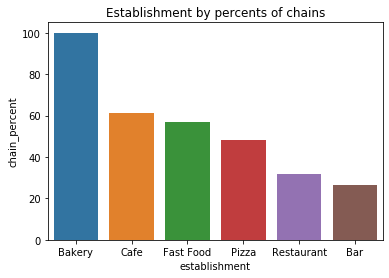

In [54]:
ax = sns.barplot(x='establishment', y='chain_percent', data=chain_type).set_title("Establishment by percents of chains")

In the graph, we can see that bakeries are typically chains (100%).

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Yes, that's it! Small hint: you can improve your barplot with values adding. Check this link:<a>https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</a>
</div>

#### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [57]:
chains = rest_data.query('chain == True')
chains.head()

,id,object_name,address,chain,object_type,number,street_name
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,SAN FERNANDO
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,SUNSET
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,WESTERN
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,6TH
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,SUNSET


In [60]:
chains_pivot = pd.pivot_table(chains, values=['id', 'number'], index='object_name', aggfunc={'id':'count','number':'mean'}).reset_index().sort_values(by=['id', 'number'], ascending=False)
chains_pivot.columns = ['rest_name', 'rest_num', 'seats_num']
chains_pivot.head()

,rest_name,rest_num,seats_num
2461,THE COFFEE BEAN & TEA LEAF,47,26.723404
2227,SUBWAY,31,16.419355
519,DOMINO'S PIZZA,15,12.333333
2611,WABA GRILL,14,42.857143
1090,KENTUCKY FRIED CHICKEN,14,33.357143


Text(0.5, 1.0, 'Chains by seats and establishments numbers')

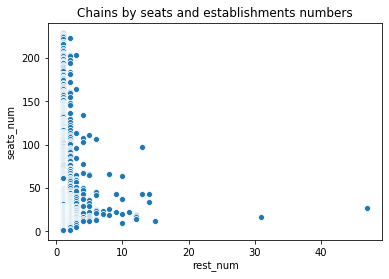

In [63]:
ax = sns.scatterplot(data=chains_pivot, x="rest_num", y="seats_num")
ax.set_title("Chains by seats and establishments numbers")

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Very good, this scatter plot is optimal for this case. Since the distribution of the number of places is clearly not normal, it is better to use mode or median as the average metric. 
</div>


Chains are characterized by few establishments with a lot of seats.

#### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [66]:
type_seats = pd.pivot_table(chains, values=['number'], index='object_type', aggfunc={'number':'mean'}).reset_index().sort_values(by=['number'], ascending=False)
type_seats.number = type_seats.number.round(2)
type_seats.head()

,object_type,number
5,Restaurant,44.84
1,Bar,40.26
3,Fast Food,38.09
2,Cafe,25.92
4,Pizza,25.37


In [69]:
fig = px.bar(type_seats, x='object_type', y='number', title='Average number of seats by type of restauran')
fig.show()

Restaurants have the greatest number of seats (45 on average).

<div class="alert alert-success">
<b>Reviewer's comment:</b> And again - you are right 💪
</div>

#### Put the data on street names from the address column in a separate column.

In [72]:
def street_name(row):
    addr = row.address
    st_name=[]
    
    try:
        tagged_address, address_type = usaddress.tag(addr)
        addr = list(tagged_address.items())

        for item in addr:
            if item[0] == 'StreetName':
                st_name.append(item[1])
                return " ".join(st_name)
            
    except usaddress.RepeatedLabelError as e :
        addr = e.parsed_string
        for item in addr:
            if item[1] == 'StreetName':
                st_name.append(item[0])
                return " ".join(st_name)


rest_data['street_name'] = rest_data.apply(street_name, axis=1)
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK


<div class="alert alert-success">
<b>Reviewer's comment:</b> Great that you are already familiar with the usaddres library!
</div>

#### Plot a graph of the top ten streets by number of restaurants. 

In [73]:
streets_by_rest_num = pd.pivot_table(rest_data, values='id', index='street_name', aggfunc='count').reset_index().sort_values('id', ascending=False)
streets_by_rest_num.columns = ['street_name', 'rest_num']
top_10_streets= streets_by_rest_num.head(10)
top_10_streets

,street_name,rest_num
420,SUNSET,404
470,WILSHIRE,398
360,PICO,370
460,WESTERN,369
179,FIGUEROA,334
342,OLYMPIC,309
444,VERMONT,288
390,SANTA MONICA,264
24,3RD,263
224,HOLLYWOOD,253


In [75]:
fig = px.bar(top_10_streets, x='street_name', y='rest_num', title='Top 10 streets  by number of restaurants')
fig.show()

Sunset st. has the greatest number of restaurants (400).

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Ok, I agree with you. But why would this happen? How you can interprete this result?
</div>

#### Find the number of streets that only have one restaurant.

In [76]:
answer = streets_by_rest_num.query('rest_num == 1').street_name.count()
print('The number of streets that only have one restaurant: ', answer)

The number of streets that only have one restaurant:  199


#### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [77]:
rests_in_top_ten_streets = rest_data.query('street_name in @top_10_streets.street_name')
rests_in_top_ten_streets.head()

,id,object_name,address,chain,object_type,number,street_name
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,SUNSET
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,WESTERN
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,SUNSET


Text(0.5, 1.0, 'Distribution of the number of seats for top 10 streets')

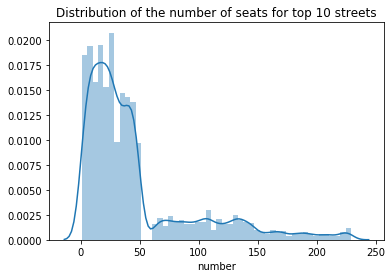

In [78]:
ax = sns.distplot(rests_in_top_ten_streets['number']) 
ax.set_title("Distribution of the number of seats for top 10 streets")

We can see here 2 trends for streets with a lot of restaurants:
* Many restaurants with few seats (0-50).
* Fewer restaurants with a lot of seats (60-230).

#### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

Overall conclusion:
* Most of the establishments are restaurants (75.2%).
* Most of the establishments are nonchains (61.9%).
* Bakeries are typically chains (100%).
* Chains are characterized by few establishments with a lot of seats.
* Restaurants have the greatest number of seats (45 on average).
* Sunset st. has the greatest number of restaurants (400).
* There are 199 streets that only have one restaurant.
* There are 2 trends for streets with a lot of restaurants:
** Many restaurants with few seats (0-50).
** Fewer restaurants with a lot of seats (60-230).

recommendations on opening a small robot-run cafe in Los Angeles:
* There aren't much cafes regareding the proportions of the various types of establishments (4.5%)
* 61% of cafes are chains.
* For a chain, It's better to open a lot of cafes with small number of seats.
* 25 is the average number of seats in cafes.
* Probably, it's better to open a cafe in a street with a lot of establishments.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Thank you for the deep research and recommendations!
</div>

## Preparing a presentation

Presentation: <https://docs.google.com/presentation/d/1MqH9fkLyl85TLSTsZ93duQ6-hGrwjI1av7hQHB87Jpo/edit?usp=sharing>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, make the URL public.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Fixed :)</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b> Nice job, laconic and vivid style 👌
</div>

## How will my project be assessed?
Your project will be assessed based on these criteria. Read them carefully before you start the project.

Here’s what project reviewers look for when assessing your project: 
* How you prepare the data for analysis
* What types of graphs you plot
* Whether you choose the correct types of graphs for the data 
* Whether you use the seaborn library to work with graphs
* How you interpret the resulting graphs
* How you calculate and interpret each parameter
* Whether you prepare a structured presentation
* Whether you stick to the principles given in this course for creating presentations
* How you convey the key message of your presentation
* Whether you follow the project structure and keep the code tidy 
* The conclusions you come to
* Whether you leave comments at each step